<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Propublica-Congress-API" data-toc-modified-id="Propublica-Congress-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Propublica Congress API</a></span><ul class="toc-item"><li><span><a href="#Function" data-toc-modified-id="Function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Function</a></span></li><li><span><a href="#House-of-Representatives" data-toc-modified-id="House-of-Representatives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>House of Representatives</a></span></li><li><span><a href="#Senate" data-toc-modified-id="Senate-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Senate</a></span></li></ul></li></ul></div>

In [57]:
import requests
import pandas as pd

# Propublica Congress API
https://projects.propublica.org/api-docs/congress-api/

In [107]:
api_key = 'F86oTZIWsYak7SzfSjd8pFxnbHFQToaFnFDhVwnY'

## Function

In [110]:
def Members(chamber = "House"):
    chamber_member_names = []
    count = 0
    members = response['results'][0]['members']
    for member in members:
        case = {}
        count += 1
#         print(count)
        case["first_name"] = member['first_name']
        case["last_name"] = member['last_name']
        if chamber == "House":
            case["chamber"] = "House of Representatives"
        else:
            case["chamber"] = "Senate"
        case["party"] = member['party']
        case["state"] = member["state"]
        case["total_votes"] = member["total_votes"]
        case["missed_votes"] = member["missed_votes"]
        try:
            case["missed_vote_pct"] = member['missed_votes_pct']
        except (KeyError):
            print('missed vote percentage does not exist.')
        try:
            case["votes_with_party_pct"] = member["votes_with_party_pct"]
        except (KeyError):
            print("votes with with party does not exist.")
        try:
            case["votes_against_party_pct"] = member['votes_against_party_pct']
        except (KeyError):
            print("votes with against party does not exist.")

        chamber_member_names.append(case)
    return chamber_member_names

## House of Representatives

In [111]:
api_url = 'https://api.propublica.org/congress/v1/116/House/members.json'
response = requests.get(api_url,headers={'X-API-Key':api_key}).json()
house_member_names = Members("House")
house_member_names

missed vote percentage does not exist.
votes with with party does not exist.
votes with against party does not exist.


[{'first_name': 'Ralph',
  'last_name': 'Abraham',
  'chamber': 'House of Representatives',
  'party': 'R',
  'state': 'LA',
  'total_votes': 883,
  'missed_votes': 312,
  'missed_vote_pct': 35.33,
  'votes_with_party_pct': 94.88,
  'votes_against_party_pct': 4.95},
 {'first_name': 'Alma',
  'last_name': 'Adams',
  'chamber': 'House of Representatives',
  'party': 'D',
  'state': 'NC',
  'total_votes': 883,
  'missed_votes': 26,
  'missed_vote_pct': 2.94,
  'votes_with_party_pct': 99.18,
  'votes_against_party_pct': 0.7},
 {'first_name': 'Robert',
  'last_name': 'Aderholt',
  'chamber': 'House of Representatives',
  'party': 'R',
  'state': 'AL',
  'total_votes': 883,
  'missed_votes': 43,
  'missed_vote_pct': 4.87,
  'votes_with_party_pct': 93.52,
  'votes_against_party_pct': 6.36},
 {'first_name': 'Pete',
  'last_name': 'Aguilar',
  'chamber': 'House of Representatives',
  'party': 'D',
  'state': 'CA',
  'total_votes': 883,
  'missed_votes': 8,
  'missed_vote_pct': 0.91,
  'votes_wi

In [85]:
df = pd.DataFrame(member_names)
df

,first_name,last_name,party,state,total_votes,missed_votes,missed_vote_pct,votes_with_party_pct,votes_against_party_pct
0,Ralph,Abraham,R,LA,883.0,312.0,35.33,94.88,4.95
1,Alma,Adams,D,NC,883.0,26.0,2.94,99.18,0.70
2,Robert,Aderholt,R,AL,883.0,43.0,4.87,93.52,6.36
3,Pete,Aguilar,D,CA,883.0,8.0,0.91,97.25,2.63
4,Rick,Allen,R,GA,883.0,2.0,0.23,92.33,7.56
...,...,...,...,...,...,...,...,...,...
444,Ron,Wright,R,TX,883.0,162.0,18.35,93.15,6.71
445,John,Yarmuth,D,KY,883.0,17.0,1.93,98.84,1.04
446,Ted,Yoho,R,FL,883.0,78.0,8.83,87.63,12.25
447,Don,Young,R,AK,883.0,39.0,4.42,87.93,11.95


In [72]:
df["missed_vote_pct"].describe()

count    448.000000
mean       4.065379
std        7.927958
min        0.000000
25%        0.790000
50%        1.930000
75%        4.107500
max       91.280000
Name: missed_vote_pct, dtype: float64

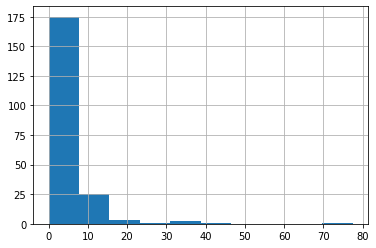

In [76]:
df.loc[df["party"] == "R"]["missed_vote_pct"].hist()

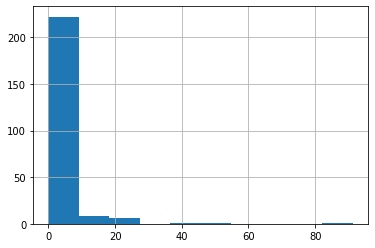

In [75]:
df.loc[df["party"] == "D"]["missed_vote_pct"].hist()

## Senate

In [112]:
api_url = 'https://api.propublica.org/congress/v1/116/Senate/members.json'
response = requests.get(api_url,headers={'X-API-Key':api_key}).json()
senate_member_names = Members("Senate")
senate_member_names

[{'first_name': 'Lamar',
  'last_name': 'Alexander',
  'chamber': 'Senate',
  'party': 'R',
  'state': 'TN',
  'total_votes': 584,
  'missed_votes': 107,
  'missed_vote_pct': 18.32,
  'votes_with_party_pct': 95.99,
  'votes_against_party_pct': 4.01},
 {'first_name': 'Tammy',
  'last_name': 'Baldwin',
  'chamber': 'Senate',
  'party': 'D',
  'state': 'WI',
  'total_votes': 584,
  'missed_votes': 1,
  'missed_vote_pct': 0.17,
  'votes_with_party_pct': 93.43,
  'votes_against_party_pct': 6.57},
 {'first_name': 'John',
  'last_name': 'Barrasso',
  'chamber': 'Senate',
  'party': 'R',
  'state': 'WY',
  'total_votes': 584,
  'missed_votes': 0,
  'missed_vote_pct': 0.0,
  'votes_with_party_pct': 96.55,
  'votes_against_party_pct': 3.45},
 {'first_name': 'Michael',
  'last_name': 'Bennet',
  'chamber': 'Senate',
  'party': 'D',
  'state': 'CO',
  'total_votes': 584,
  'missed_votes': 129,
  'missed_vote_pct': 22.09,
  'votes_with_party_pct': 94.33,
  'votes_against_party_pct': 5.67},
 {'first